In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


df = pd.read_csv("listings/listings_ford_mustang-mach-e_added.csv")
df['year'] = pd.to_datetime(df['first-registration'], errors='coerce').dt.year
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')
df =df[df["price"]< 44000 ]
# df = df[df["mileage"] < 45000]
df = df[df["extended_range"] == "yes"]
df = df[df["seller_name"] != "Private Seller"]
df

C:\Users\Alireza\AppData\Local\Temp\ipykernel_28608\3949323778.py:7: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,make,model,mileage,fuel-type,first-registration,price,price_label,position,seller_name,seller_location,listing_zip_code,listing_url,title,drive_type,extended_range,car_type,year
0,ford,mustang mach-e,32230.0,e,07-2021,34990,top-price,1,CIAC Fordstore Gent Sterrenbeoordeling 4.5 van...,Ashlo Geerinck • BE-9050 Ledeberg,9050,https://www.autoscout24.be/nl/aanbod/ford-must...,Ford Mustang Mach-E 99kWh AWD Extended Range,AWD,yes,Premium,2021.0
5,ford,mustang mach-e,11763.0,e,11-2023,43449,top-price,32,Ford - Van den Poel Motors nv,Deinze,9800,https://www.autoscout24.be/nl/aanbod/ford-must...,Ford Mustang Mach-E 99+kWh+AWD Extended+Range ...,AWD,yes,Premium,2023.0
6,ford,mustang mach-e,39000.0,e,07-2021,31990,top-price,6,ARCADI CAR Sterrenbeoordeling 4.5 van 5 (40),Maxime Cornelis • BE-6180 Courcelles,6180,https://www.autoscout24.be/nl/aanbod/ford-must...,Ford Mustang Mach-E 99 kWh AWD Extended Range ...,AWD,yes,Premium,2021.0
10,ford,mustang mach-e,88400.0,e,05-2021,26890,good-price,10,Spirit of Legend Cars Sterrenbeoordeling 4.5 v...,BE-5030 Gembloux,5030,https://www.autoscout24.be/nl/aanbod/ford-must...,Ford Mustang Mach-E 99 kWh RWD Premium Extende...,RWD,yes,Premium,2021.0
12,ford,mustang mach-e,113347.0,e,06-2021,27900,top-price,12,FordStore Bilzen Sterrenbeoordeling 5 van 5 (23),Christophe de Schaetzen • BE-3740 Bilzen,3740,https://www.autoscout24.be/nl/aanbod/ford-must...,Ford Mustang Mach-E Premium 99KW extended rang...,unknown,yes,Premium,2021.0
16,ford,mustang mach-e,31000.0,e,07-2021,29900,unknown,16,AutoScout24 Luxembourg,BE-6700 Arlon,6700,https://www.autoscout24.be/nl/aanbod/ford-must...,Ford Mustang Mach-E Extended Range 99kWh Versi...,unknown,yes,unknown,2021.0
19,ford,mustang mach-e,32759.0,e,06-2022,37990,good-price,19,Ford Unicars Kortrijk Sterrenbeoordeling 4.5 v...,Simon Ver Elst • BE-8500 Kortrijk,8500,https://www.autoscout24.be/nl/aanbod/ford-must...,Ford Mustang Mach-E 91kWh 272kW Extended Range...,AWD,yes,Premium,2022.0
25,ford,mustang mach-e,44342.0,e,05-2022,36900,good-price,26,FordStore Driesen Genk Sterrenbeoordeling 4.5 ...,Geert Nickmans • BE-3600 Genk,3600,https://www.autoscout24.be/nl/aanbod/ford-must...,Ford Mustang Mach-E 99kWh AWD 371PK BIJ DRIESE...,AWD,yes,Premium,2022.0
30,ford,mustang mach-e,25402.0,e,06-2023,42950,top-price,31,Van Mossel Ford Zaventem Sterrenbeoordeling 3 ...,BE-1930 Zaventem,1930,https://www.autoscout24.be/nl/aanbod/ford-must...,Ford Mustang Mach-E Premium awd 99kwh|driving ...,AWD,yes,Premium,2023.0
41,ford,mustang mach-e,26000.0,e,06-2022,43950,top-price,42,Dams Cars Sterrenbeoordeling 4.5 van 5 (10),XXX XXXXX • BE-2440 Geel,2440,https://www.autoscout24.be/nl/aanbod/ford-must...,"Ford Mustang Mach-E 99 kWh AWD GT 487pk, 26000km",AWD,yes,GT,2022.0


In [143]:


def plot_grouped_scatter_by_category(df, group_col, x_col, y_col, color_col, title=None, cmap='plasma'):
    """
    Scatter plot grouped by a categorical column using different marker shapes.

    Parameters:
        df (pd.DataFrame): The input dataframe.
        group_col (str): Column for grouping (e.g. 'drive_type').
        x_col (str): Column for X-axis (e.g. 'mileage').
        y_col (str): Column for Y-axis (e.g. 'year').
        color_col (str): Column for color encoding (e.g. 'price').
        title (str): Optional custom title.
        cmap (str): Colormap to use for color encoding.
    """
    # Marker cycle
    markers = ['o', 's', '^', 'X', 'D', 'v', '*', 'P', 'h', '+', 'x']
    unique_groups = df[group_col].dropna().unique()
    marker_map = {group: markers[i % len(markers)] for i, group in enumerate(unique_groups)}

    plt.figure(figsize=(10, 7))

    for group in unique_groups:
        group_df = df[df[group_col] == group].dropna(subset=[x_col, y_col, color_col])
        plt.scatter(
            group_df[x_col],
            group_df[y_col],
            c=group_df[color_col],
            cmap=cmap,
            marker=marker_map[group],
            s=40,
            label=group,
            alpha=0.75
        )
        for _, row in group_df.iterrows():
            plt.text(
                row[x_col],
                row[y_col] + 0.15,  # Slightly above the point
                f"{int(row[color_col])}€" if pd.notnull(row[color_col]) else "",
                fontsize=8,
                ha='center',
                va='bottom'
            )

    plt.colorbar(label=f"{color_col.capitalize()}")
    plt.xlabel(x_col.replace('_', ' ').capitalize())
    plt.ylabel(y_col.replace('_', ' ').capitalize())
    if title:
        plt.title(title)
    else:
        plt.title(f"{group_col.capitalize()} Comparison: {y_col.capitalize()} vs {x_col.capitalize()}")

    plt.legend(title=group_col.replace('_', ' ').capitalize())
    plt.grid(True)
    plt.show()

from IPython.display import display

# Show filtered table


def plot_filtered_scatter(df, filter_col, filter_val, x_col, y_col, color_col, title=None, cmap='plasma'):
    """
    Plot a scatter plot with X, Y, and Color based on filtered data.

    Parameters:
        df (pd.DataFrame): The input dataframe.
        filter_col (str): Column to filter on (e.g. 'drive_type').
        filter_val (str): Value to filter (e.g. 'AWD').
        x_col (str): Column for X-axis (e.g. 'mileage').
        y_col (str): Column for Y-axis (e.g. 'year').
        color_col (str): Column for color encoding (e.g. 'price').
        title (str): Optional custom title.
        cmap (str): Colormap to use.
    """
    sub_df = df[df[filter_col] == filter_val].dropna(subset=[x_col, y_col, color_col])

    plt.figure(figsize=(8, 6))
    sc = plt.scatter(sub_df[x_col], sub_df[y_col], c=sub_df[color_col], cmap=cmap, s=40)
    plt.colorbar(sc, label=f"{color_col.capitalize()}")
    plt.xlabel(x_col.replace('_', ' ').capitalize())
    plt.ylabel(y_col.replace('_', ' ').capitalize())
    if title:
        plt.title(title)
    else:
        plt.title(f"{filter_val} Cars: {y_col.capitalize()} vs {x_col.capitalize()} (Color = {color_col})")

    for _, row in sub_df.iterrows():
        plt.text(row[x_col], row[y_col], f"{int(row[color_col])}€", fontsize=8, ha='center', va='bottom')

    plt.grid(True)
    print("\nFiltered DataFrame:")
    display(sub_df.sort_values(by=color_col, ascending=False).reset_index(drop=True))
    plt.show()




Filtered DataFrame:


,make,model,mileage,fuel-type,first-registration,price,price_label,position,seller_name,seller_location,listing_zip_code,listing_url,title,drive_type,extended_range,car_type,year
0,ford,mustang mach-e,31000.0,e,07-2021,29900,unknown,16,AutoScout24 Luxembourg,BE-6700 Arlon,6700,https://www.autoscout24.be/nl/aanbod/ford-must...,Ford Mustang Mach-E Extended Range 99kWh Versi...,unknown,yes,unknown,2021.0
1,ford,mustang mach-e,113347.0,e,06-2021,27900,top-price,12,FordStore Bilzen Sterrenbeoordeling 5 van 5 (23),Christophe de Schaetzen • BE-3740 Bilzen,3740,https://www.autoscout24.be/nl/aanbod/ford-must...,Ford Mustang Mach-E Premium 99KW extended rang...,unknown,yes,Premium,2021.0


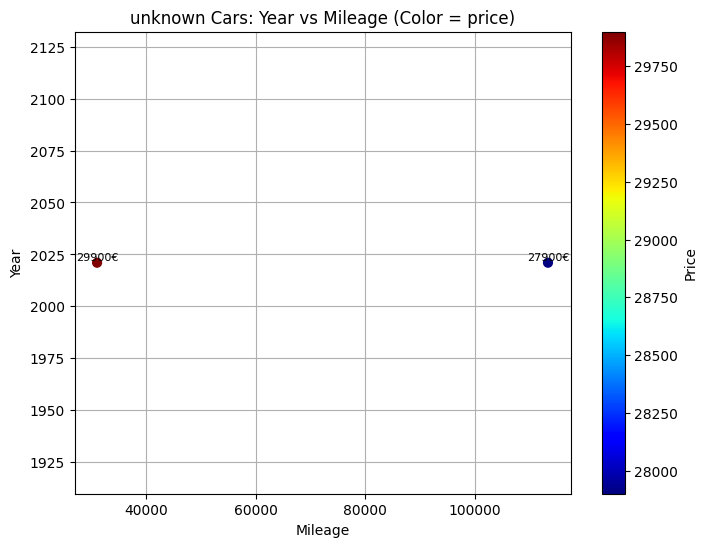

In [151]:
plot_filtered_scatter(df, filter_col="drive_type", filter_val="unknown", x_col="mileage", y_col="year", color_col="price",cmap="jet")


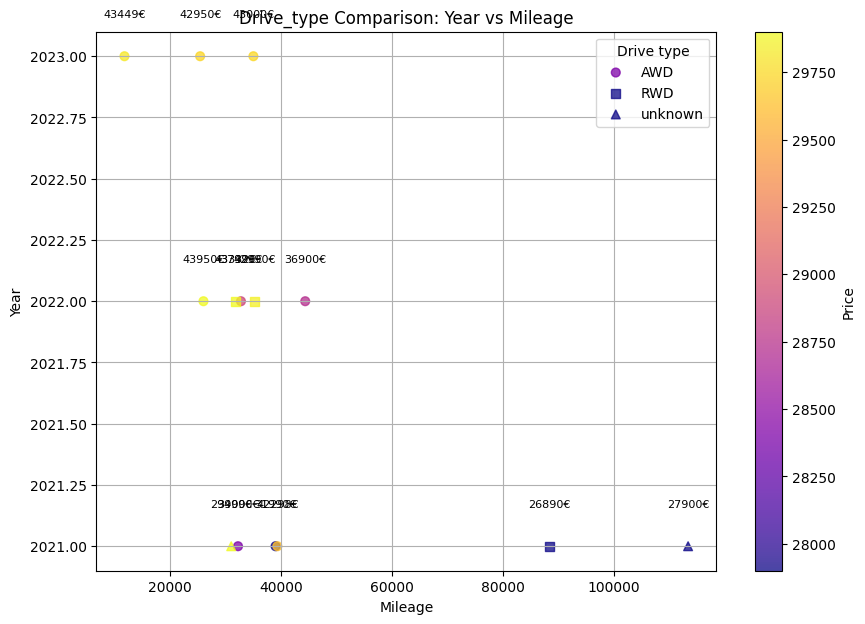

In [149]:
plot_grouped_scatter_by_category(
    df,
    group_col="drive_type",
    x_col="mileage",
    y_col="year",
    color_col="price",
)


In [63]:
df.columns

Index(['make', 'model', 'mileage', 'fuel-type', 'first-registration', 'price',
       'price_label', 'position', 'seller_name', 'seller_location',
       'listing_zip_code', 'listing_url', 'title', 'drive_type',
       'extended_range', 'car_type', 'year'],
      dtype='object')

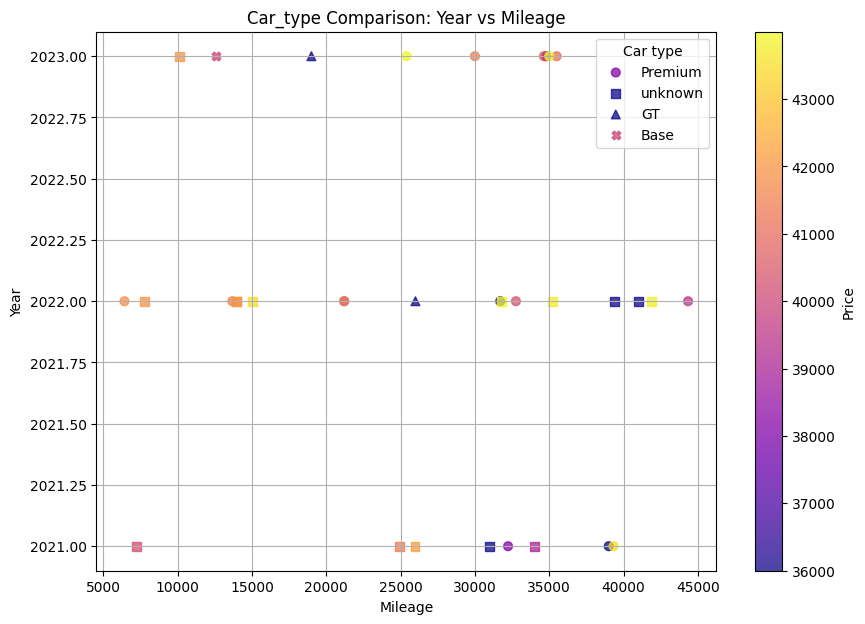

In [64]:
plot_grouped_scatter_by_category(
    df,
    group_col="car_type",
    x_col="mileage",
    y_col="year",
    color_col="price",
)
